/tmp/ipykernel_323/3874087139.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['a'].set_xticklabels(empty_string_labels)


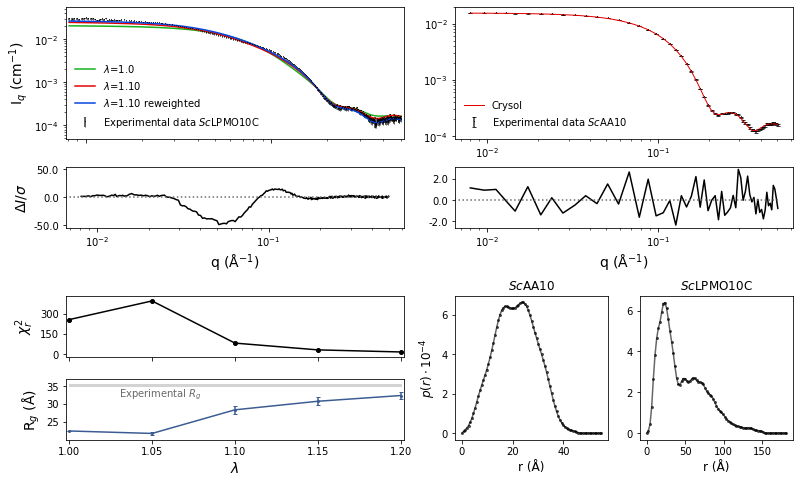

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #https://xkcd.com/color/rgb/
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

file_list = ['data_WT_saxs_1.0.dat','data_WT-1.10_05122022.dat']

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["red"]
c3 = sns.xkcd_rgb["sky blue"]
c4 = sns.xkcd_rgb["green"]
c5 = sns.xkcd_rgb["orange"]
c6 = sns.xkcd_rgb["blue"]
c7 = sns.xkcd_rgb["denim blue"]
color_list = [c1,c2,c3,c4,c5,c6]

#fig, ax = plt.subplots(nrows=4, ncols=1, dpi=300,figsize=(5.5,6.6), gridspec_kw=dict(height_ratios=[1.5,0.5,0.5,0.5],hspace=0.2),constrained_layout=True)
fig, ax = plt.subplot_mosaic([['a', 'a', 'e', 'e'],
                               ['a', 'a', 'e', 'e'],
                               ['b','b', 'f','f'],
                               ['c','c', 'g','h'],
                               ['d','d','g','h']],
                              figsize=(11, 6.6), layout="constrained")

#plot saxs fitting
data = np.loadtxt(file_list[0])
x = data[:,0]
avg_exp = data[:,1]
sigma_exp = data[:,2]
avg_calc = data[:,3]

ax['a'].errorbar(x, avg_exp,yerr=sigma_exp,fmt=',', capsize=0.2, color=c1,alpha=0.8,label='Experimental data $Sc$LPMO10C')
ax['a'].plot(x, avg_calc,color=c4,label=r'$\lambda$=1.0')

data = np.loadtxt(file_list[1])
avg_calc = data[:,3]
avg_calc_rew = data[:,4]
ax['a'].plot(x, avg_calc,color=c2,label=r'$\lambda$=1.10')
ax['a'].plot(x, avg_calc_rew,color=c6,label=r'$\lambda$=1.10 reweighted')

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax.set_ylim(0,1.05)
#ax.set_xlim(0.,150.)
ax['a'].set_ylabel(r'I$_{q}$ (cm$^{-1}$)', fontsize=14)
ax['a'].set_xscale('log')
ax['a'].set_yscale('log')
ax['a'].legend(frameon=False)


#trick to hide labels in ax[1]
labels = [item.get_text() for item in ax['a'].get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax['a'].set_xticklabels(empty_string_labels)
ax['a'].margins(x=0.01,y=0.1)

#plot PW-rescaling assessment

ax['b'].plot(x, (avg_exp-avg_calc_rew)/sigma_exp, 'k')
ax['b'].set_xscale('log')
ax['b'].set_xlabel(r'q (Å$^{-1}$)', fontsize=14)
ax['b'].set_ylabel(r'$\Delta I/\sigma$', fontsize=14)
ax['b'].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax['b'].set_ylim(-55,55)
ax['b'].hlines(x.min(),x.max(),0, color='dimgray', linestyles='dotted')


SAXS_rg = np.zeros(5) + 35.3
SAXS_rg_error = np.zeros(5) + 0.4
thetas = np.array([1.0, 1.05, 1.10,1.15, 1.20])
M3_rg =np.array([2.233577, 2.163699, 2.831274, 3.073073, 3.235164 ])*10
M3_rg_err =np.array([0.009194, 0.035357, 0.108571, 0.111684, 0.094529 ])*10
M3_chi2 = np.array([256.25,395.87,80.91,30.25,14.76])
ax['c'].plot(thetas, M3_chi2, marker='o', markersize=4, color='k', label='M3_chi2')
ax['c'].set_ylabel(r'$\chi^{2}_{r}$', weight='bold', fontsize=14)
ax['c'].set_yticks([0.0,150.0,300.0])
ax['c'].set_xticks(thetas)

#trick to hide labels in ax[1]
labels = [item.get_text() for item in ax['c'].get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax['c'].set_xticklabels(empty_string_labels)
ax['c'].margins(x=0.01,y=0.1)

#ax[2].plot(thetas, SAXS_rg, color='black', label='SAXS')
ax['d'].fill_between(thetas, SAXS_rg-SAXS_rg_error, SAXS_rg+SAXS_rg_error, color='lightgrey')
ax['d'].errorbar(thetas, M3_rg, yerr=M3_rg_err, marker='o', markersize=2, capsize=2, color=c7)
ax['d'].set_xlabel(r'$\lambda$', fontsize=14)
ax['d'].set_ylabel(r'R$_{g}$ (Å)', fontsize=14)
ax['d'].set_xticks([1.0,1.05,1.10,1.15,1.20])
ax['d'].set_yticks([25.0,30.0,35.0,40.0])
ax['d'].margins(x=0.01,y=0.1)
ax['d'].text(1.03,32,'Experimental $R_g$', color='dimgray', fontfamily='sans-serif')
#print(ax[0].get_position())
#fig.text(0.01, 0.96, 'A', fontsize=16, fontfamily='sans-serif')
#fig.text(0.01, 0.35, 'B', fontsize=16, fontfamily='sans-serif')
#fig.text(0.01, 0.20, 'C', fontsize=16, fontfamily='sans-serif')


AA10_data = np.loadtxt('crysol/aa10.fit', skiprows=5)
ax['e'].errorbar(AA10_data[:,0], AA10_data[:,1],yerr=AA10_data[:,2], fmt=',', markersize=8, capsize=2, color=c1, alpha=0.8,label='Experimental data $Sc$AA10')
ax['e'].plot(AA10_data[:,0], AA10_data[:,3], linewidth=1, color=c2,label='Crysol')
ax['e'].set_yscale('log')
ax['e'].set_xscale('log')
ax['e'].legend(frameon=False)



ax['f'].plot(AA10_data[:,0], (AA10_data[:,1]-AA10_data[:,3])/AA10_data[:,2], 'k')
ax['f'].set_xscale('log')
ax['f'].set_xlabel(r'q (Å$^{-1}$)', fontsize=14)
ax['f'].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax['b'].set_ylim(-55,55)
ax['f'].hlines(AA10_data[:,0].min(),AA10_data[:,0].max(),0, color='dimgray', linestyles='dotted')



data = np.loadtxt('BayesApp_AA10/pr.d')
x = data[:,0]
pR = data[:,1]
pR_sigma = data[:,2]

ax['g'].errorbar(x, pR*1e4,yerr=pR_sigma*1e4,fmt='.-', markersize=4, capsize=0, color=c1,alpha=0.6,label='Experimental data')
ax['g'].set_ylabel(r'$p(r) \cdot 10^{-4}$', fontsize=12)
ax['g'].set_xlabel('r (Å)', fontsize=12)
ax['g'].set_title('$Sc$AA10')




data = np.loadtxt('BayesApp_full-lengthWT/pr.d')
x = data[:,0]
pR = data[:,1]
pR_sigma = data[:,2]

ax['h'].errorbar(x, pR*1e4,yerr=pR_sigma*1e4,fmt='.-', markersize=4, capsize=0, color=c1,alpha=0.6,label='Experimental data')
ax['h'].set_xlabel('r (Å)', fontsize=12)
ax['h'].set_title('$Sc$LPMO10C')

plt.savefig('fitting-plots_2.png', dpi=300)
plt.show()
